# UCS, DIJKSTRA Y DLS ALGORITHMS

In [1]:
import heapq as hq
import math
import graphviz as gv

### Creacion y Lectura del archivo

In [2]:
%%file g.in
1 7 2 2 3 4 4 6
0 7 2 4 3 4 5 3 6 2
0 2 1 4
0 4 1 4 5 9 7 3
0 6 6 9 7 9
1 3 3 9 6 8 7 4
1 2 4 9 5 8
3 3 4 9 5 4

Overwriting g.in


In [3]:
with open("g.in") as f:
    G = []
    for line in f:
        if line.startswith("-"):
            G.append([])
        else:
            a = line.split()
            G.append([(int(a[i]), float(a[i + 1])) for i in range(0, len(a), 2)])
print("[", end="")
for l in G:
    print(f"{l}")
print("]")

[[(1, 7.0), (2, 2.0), (3, 4.0), (4, 6.0)]
[(0, 7.0), (2, 4.0), (3, 4.0), (5, 3.0), (6, 2.0)]
[(0, 2.0), (1, 4.0)]
[(0, 4.0), (1, 4.0), (5, 9.0), (7, 3.0)]
[(0, 6.0), (6, 9.0), (7, 9.0)]
[(1, 3.0), (3, 9.0), (6, 8.0), (7, 4.0)]
[(1, 2.0), (4, 9.0), (5, 8.0)]
[(3, 3.0), (4, 9.0), (5, 4.0)]
]


### Graficado de un Grafo

In [4]:
def drawGraph(G, path=[], h=[], directed=False):
    g = gv.Digraph("nombre") if directed else gv.Graph("nombre")
    n = len(G)

    for u, hi in enumerate(h):
        g.node(str(u), f"{u}({hi})")

    done = set()
    for v, u in enumerate(path):
        if u != -1:
            g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
            done.add((u, v))
            done.add((v, u))
    for u in range(n):
        g.node(str(u))
        for v, w in G[u]:
            if not (u, v) in done:
                done.add((u, v))
                done.add((v, u))
                g.edge(str(u), str(v), str(w))

    return g

In [5]:
print(G)

[[(1, 7.0), (2, 2.0), (3, 4.0), (4, 6.0)], [(0, 7.0), (2, 4.0), (3, 4.0), (5, 3.0), (6, 2.0)], [(0, 2.0), (1, 4.0)], [(0, 4.0), (1, 4.0), (5, 9.0), (7, 3.0)], [(0, 6.0), (6, 9.0), (7, 9.0)], [(1, 3.0), (3, 9.0), (6, 8.0), (7, 4.0)], [(1, 2.0), (4, 9.0), (5, 8.0)], [(3, 3.0), (4, 9.0), (5, 4.0)]]


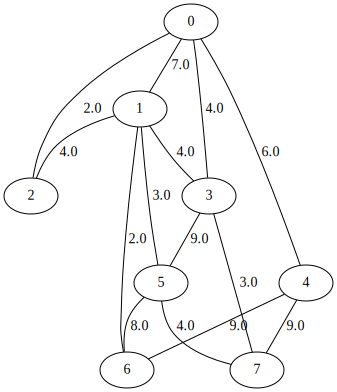

In [6]:
aux = []
drawGraph(G, h=aux)

### Implementacion del algoritmo de Dijkstra o UCS ( RECORRIDO POR COSTO UNIFORME )

In [11]:
def dijkstra(G, s):
    n = len(G)
    visited = [False] * n
    path = [-1] * n
    cost = [math.inf] * n
    cost[s] = 0

    pq = []
    hq.heappush(pq, (0, s))
    while pq:
        _, u = hq.heappop(pq)
        visited[u] = True
        for v, w in G[u]:
            new_cost = cost[u] + w
            if not visited[v] and new_cost < cost[v]:
                cost[v] = new_cost
                path[v] = u
                hq.heappush(pq, (new_cost, v))
    return path, cost

In [12]:
path_disjktra, cost_disjktra = dijkstra(G, 7)
print(f"El path del grafo con Dijkstra es --->  {path_disjktra}")
print(f"El cost del grafo con Dijkstra es --->  {cost_disjktra}")

El path del grafo con Dijkstra es --->  [3, 3, 0, 7, 7, 7, 1, -1]
El cost del grafo con Dijkstra es --->  [7.0, 7.0, 9.0, 3.0, 9.0, 4.0, 9.0, 0]


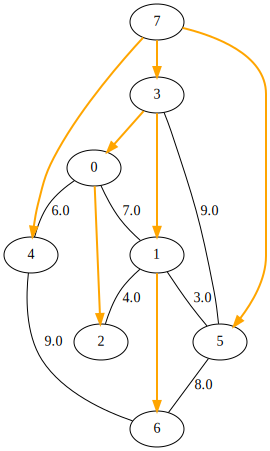

In [13]:
drawGraph(G, path=path_disjktra, h=aux)

### DLS ( RECORRIDO EN PROFUNDIDAD LIMITADA )

In [15]:
def dls(G, s, L): # depth limited search (EVADE PESOS)
  n = len(G)
  visited = [False]*n
  path = [-1]*n

  def _f(u,l):
    if l > 0:
      visited[u] = True
      for v,w in G[u]:
        if not visited[v]:
          path[v] = u
          _f(v, l - 1)
  _f(s, L)
  return path

In [16]:
path_dls = dls(G, 1, 4)
print(path_dls)

[1, -1, 0, 0, 0, 3, 4, 3]


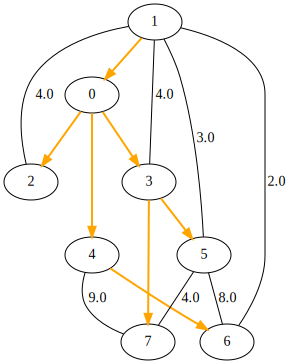

In [17]:
drawGraph(G, path=path_dls, h=aux)

### IDS ( RECORRIDO EN PROFUNDIDAD ITERATIVA )

### Creacion de un grafo para IDS

In [ ]:
%%file 0503.al
1 4
-
-
2 6 17
7
2
10
0 8
4
8
-
8 14
16
9 17
15
11 17
15 17
13

### Lectura del grafo y representacion en listas

In [18]:
with open("0503.al") as f:
  G_3 = []
  for line in f:
    if line == "-\n":
      G_3.append([])
    else:
      G_3.append([int(x) for x in line.split()])

for x in G_3:
  print(x)

[1, 4]
[]
[]
[2, 6, 17]
[7]
[2]
[10]
[0, 8]
[4]
[8]
[]
[8, 14]
[16]
[9, 17]
[15]
[11, 17]
[15, 17]
[13]


### OTRA VERSION DEL GRAFICADO DE GRAFOS

In [20]:
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for edge in G[u]:
      if weighted:
        v, w = edge
      else:
        v = edge
      draw = False
      if not directed and not f"{u},{v}" in added:
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed and not f"{u},{v}" in added:
        added.add(f"{u},{v}")
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

### COMO IDS USA A DLS ---> CREAMOS UNA VERSION DE DLS SIN USAR PESOS

In [21]:
def dls2(G, s, L):
  n = len(G)
  visited = [False]*n
  path = [-1]*n

  def _dls2(u, L):
    if L > 0 and not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          path[v] = u
          _dls2(v, L - 1)

  _dls2(s, L)
  return path

In [22]:
def ids(G, start, target):
  n = len(G)
  for limit in range(n):
    path = dls2(G, start, limit)
    if path[target] != -1:
      break
  return path

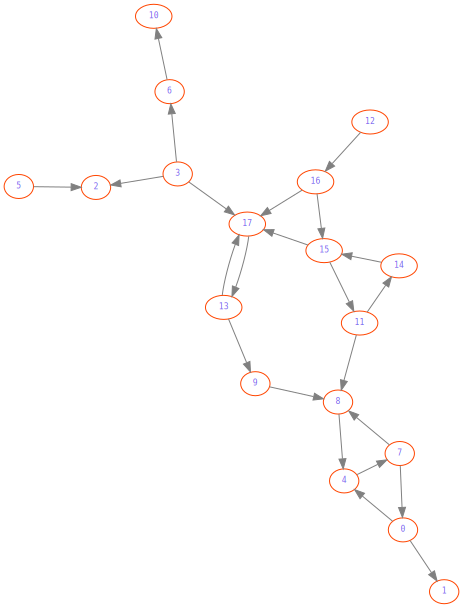

In [23]:
drawG_al(G_3, directed=True, layout="neato")

[-1, -1, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15]


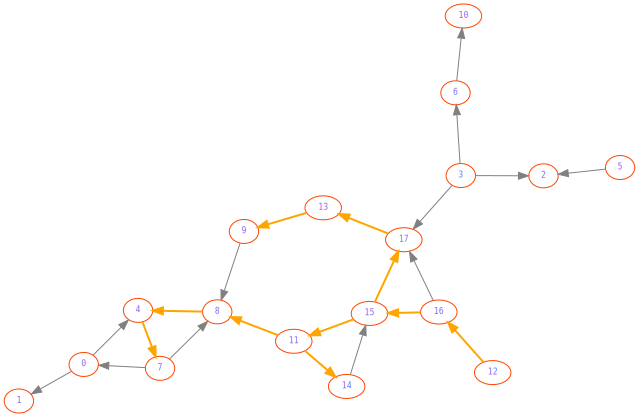

In [24]:
path_ids_1 = ids(G_3, start = 12, target = 7)
print(path_ids_1)
drawG_al(G_3, directed = True, path = path_ids_1, layout = "neato")

[7, 0, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15]


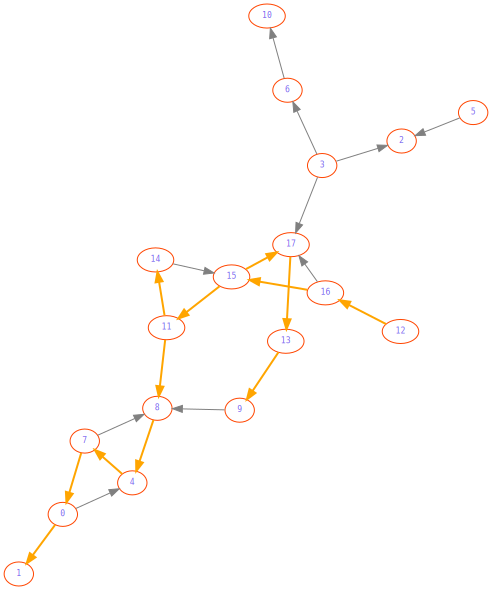

In [25]:
path_ids_2 = ids(G_3, start = 12, target = 10)
print(path_ids_2)
drawG_al(G_3, directed = True, path = path_ids_2, layout = "neato")

### A Star (A')

In [26]:
def a_star(G, s, t, h):
    n = len(G)
    g = [math.inf]*n
    visited = [False]*n
    f = [math.inf]*n
    path = [-1]*n

    g[s] = 0
    f[s] = h[s]
    q = []
    hq.heappush(q, (f[s], s))
    while q:
        _, n = hq.heappop(q)
        if not visited[n]:
            visited[n] = True
            if n == t:
                break
            for v, w in G[n]:
                if not visited[v] and g[n] + w < g[v]:
                    path[v] = n
                    g[v] = g[n] + w
                    f[v] = g[v] + h[v]
                    hq.heappush(q, (f[v], v))

    return path

### Preparando el entorno para el caso de A star

In [27]:
def manhattan(a, b):
    x0, y0 = a
    x1, y1 = b
    return abs(x0 - x1) + abs(y0 - y1)

In [28]:
tamano = 6 # Tamaño de la la lista de listas tamano x tamano
G_2 = [[] for i in range(tamano * tamano)] # Crea una lista de listas de (tamano x tamano) elementos
end = (5, 5) # Variable par para el calculo de h
h = [] # Peso especiales por vertice, calculados por manhattan

### La siguiente funcion genera los datos del grafo

In [29]:
for i in range(tamano):
    for j in range(tamano):
        idx = i * tamano + j
        nbrs = [(i-1, j-1, 2), (i-1, j, 1), (i-1, j+1, 2),
                (  i, j-1, 1),              (  i, j+1, 1),
                (i+1, j-1, 2), (i+1, j, 1), (i+1, j+1, 2)]
        for i0, j0, w in nbrs:
            if i0 < 0 or i0 >= tamano or j0 < 0 or j0 >= tamano:
                continue
            idx0 = i0 * tamano + j0
            G_2[idx].append((idx0, w))
        h.append(manhattan((i, j), end))

In [30]:
print(G_2)

[[(1, 1), (6, 1), (7, 2)], [(0, 1), (2, 1), (6, 2), (7, 1), (8, 2)], [(1, 1), (3, 1), (7, 2), (8, 1), (9, 2)], [(2, 1), (4, 1), (8, 2), (9, 1), (10, 2)], [(3, 1), (5, 1), (9, 2), (10, 1), (11, 2)], [(4, 1), (10, 2), (11, 1)], [(0, 1), (1, 2), (7, 1), (12, 1), (13, 2)], [(0, 2), (1, 1), (2, 2), (6, 1), (8, 1), (12, 2), (13, 1), (14, 2)], [(1, 2), (2, 1), (3, 2), (7, 1), (9, 1), (13, 2), (14, 1), (15, 2)], [(2, 2), (3, 1), (4, 2), (8, 1), (10, 1), (14, 2), (15, 1), (16, 2)], [(3, 2), (4, 1), (5, 2), (9, 1), (11, 1), (15, 2), (16, 1), (17, 2)], [(4, 2), (5, 1), (10, 1), (16, 2), (17, 1)], [(6, 1), (7, 2), (13, 1), (18, 1), (19, 2)], [(6, 2), (7, 1), (8, 2), (12, 1), (14, 1), (18, 2), (19, 1), (20, 2)], [(7, 2), (8, 1), (9, 2), (13, 1), (15, 1), (19, 2), (20, 1), (21, 2)], [(8, 2), (9, 1), (10, 2), (14, 1), (16, 1), (20, 2), (21, 1), (22, 2)], [(9, 2), (10, 1), (11, 2), (15, 1), (17, 1), (21, 2), (22, 1), (23, 2)], [(10, 2), (11, 1), (16, 1), (22, 2), (23, 1)], [(12, 1), (13, 2), (19, 1), 

In [31]:
print(h) # Imprime los pesos especiales de cada nodo

[10, 9, 8, 7, 6, 5, 9, 8, 7, 6, 5, 4, 8, 7, 6, 5, 4, 3, 7, 6, 5, 4, 3, 2, 6, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1, 0]


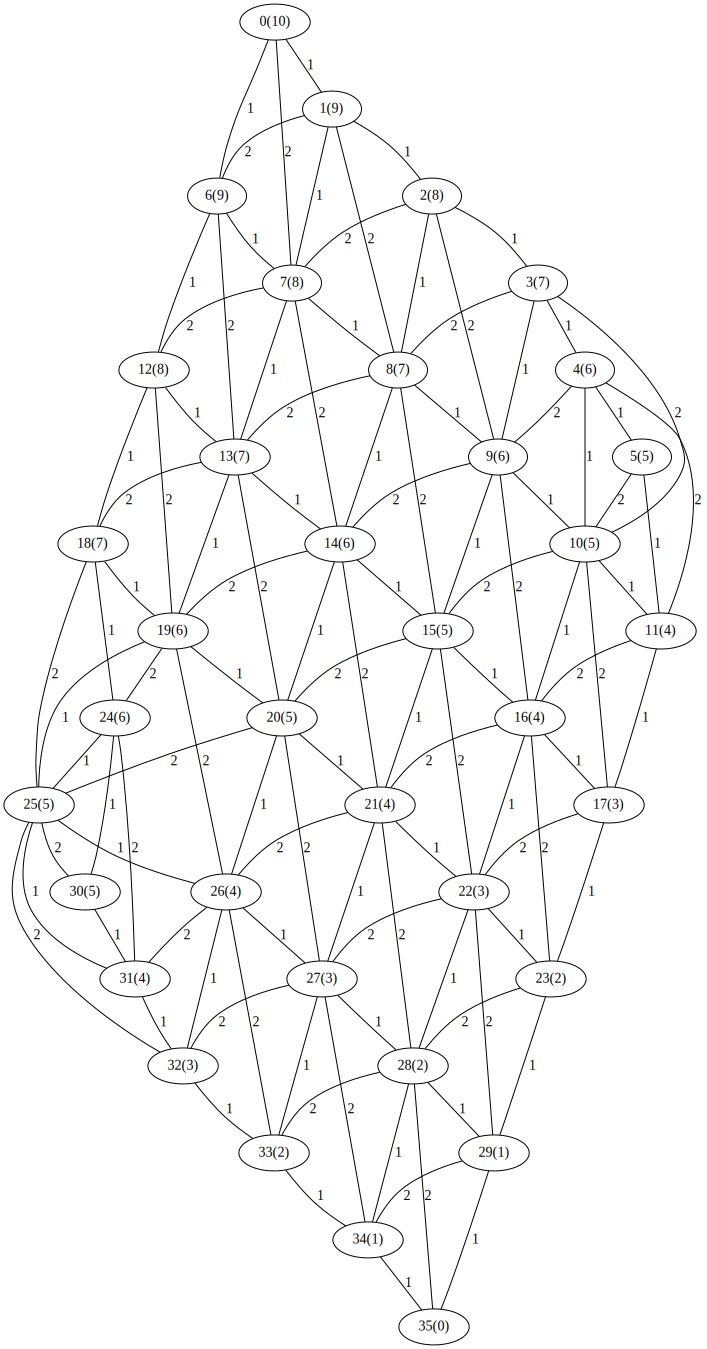

In [32]:
drawGraph(G_2, h=h)

In [33]:
path_Astar = a_star(G_2, 7, 35, h)
print(path_Astar)

[7, 7, 7, 8, 9, 10, 7, -1, 7, 8, 9, 10, 7, 7, 7, 8, 9, 10, 13, 13, 13, 14, 15, 16, 19, 19, 19, 20, 21, 22, 25, 25, 25, 26, 27, 28]


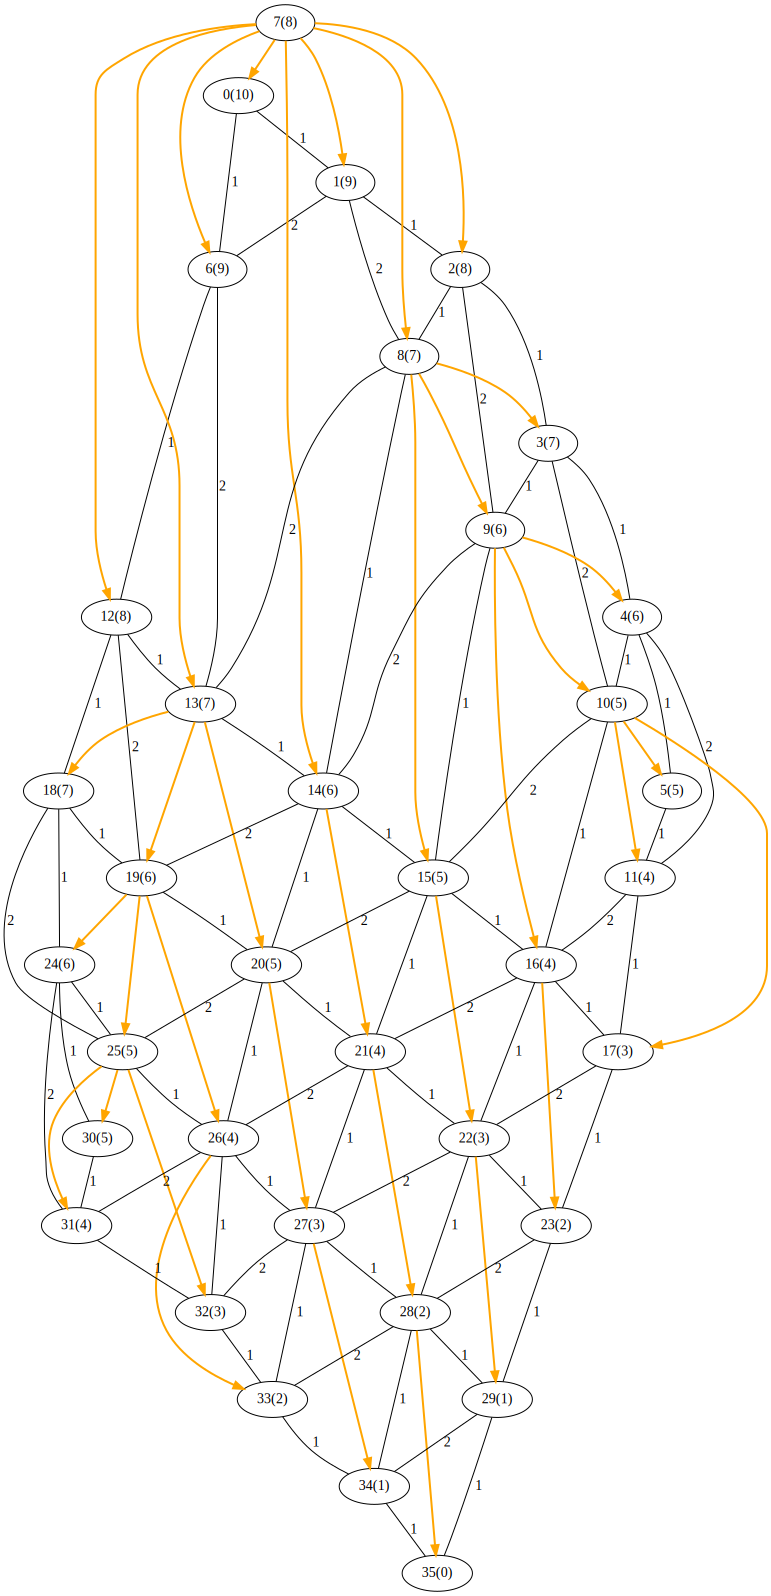

In [34]:
drawGraph(G_2, path = path_Astar, h = h)